# **Import Libraries & Data Loading**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re # if u want to learn regex [https://regex101.com/]
import string
import random # Random number generators - Library for generating random numbers, selecting random elements, shuffling sequences, etc.
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

pd.set_option("display.max_columns", None)
# pd.set_option("display.max_row", None)

In [ ]:
!pip install sastrawi nlp-id catboost visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 25.5 MB/s eta 0:00:00
  Created wheel for nlp-id: filename=nlp_id-0.1.15.0-py3-none-any.whl size=58153892 sha256=2d8f7e611bad6745e63b02d0d40e592a260e9622b9f77bb228c38d802537b7d8
  Stored in directory: /root/.cache/pip/wheels/85/34/2a/deaf7b7896a1eed336b874e1a7732588d40bb7bdc0a824e73e
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=3d961be48b69004efb3890edc7f83c9e2e0401895c0ee8fd46d29cf225bc2b64
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c7

In [ ]:
import nltk # Natural Language Toolkit - Library for natural language processing (NLP) tasks such as tokenization, stemming, tagging, parsing, and more.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tqdm import tqdm # A Fast, Extensible Progress Bar - Library for creating progress bars to monitor the progress of iterations or tasks.
from nltk.stem import WordNetLemmatizer, PorterStemmer

from nlp_id.lemmatizer import Lemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, GlobalMaxPool1D, BatchNormalization, Dropout, GRU, Reshape, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf

import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight


import keras
from keras.initializers import Constant
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    precision_score, # Precision score - Metric for evaluating classification models, measuring the ratio of correctly predicted positive observations to the total predicted positives.
    recall_score, # Recall score - Metric for evaluating classification models, measuring the ratio of correctly predicted positive observations to the total actual positives.
    f1_score, # F1 score - Harmonic mean of precision and recall, a metric for evaluating classification models.
    classification_report, # Classification report - Summary of the precision, recall, F1 score, and support for each class in a classification problem.
    accuracy_score, # Accuracy score - Metric for evaluating classification models, measuring the proportion of correct predictions to the total number of predictions.
    balanced_accuracy_score
)

In [ ]:
def check_duplicates(dataframe):
    print("Duplicate Values (Top 10):")
    duplicate_values = dataframe[dataframe.duplicated()]
    print(f"Number of Duplicate Rows: {duplicate_values.shape[0]}")
    display(duplicate_values.head(10))

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

def basic_data_info(dataframe):
    print("Data Preview:")
    print("---------------------------")
    display(dataframe.head())

    print("\nGeneral Info:")
    print("---------------------------")
    print(dataframe.info())

    print("\nDescriptive Statistics:")
    print("---------------------------")
    display(dataframe.describe().T)

# **Load Data**

In [ ]:
mainPath = "/content/drive/MyDrive/Colab Notebooks/2. Satria Data 2024/Pengerjaan Satria Data"
dataPath = os.path.join(mainPath, "Dataset-BDC-SatriaData-2024")

In [ ]:
train = pd.read_csv(dataPath + "/dataset_penyisihan_bdc_2024.csv", sep=";")
test = pd.read_csv(dataPath + "/dataset_unlabeled_penyisihan_bdc_2024.csv", sep=";")
submissions = pd.read_csv(dataPath + "/template_jawaban_penyisihan_bdc_2024.csv", sep=";")
lexicon_corpus = pd.read_csv(mainPath + "/colloquial-indonesian-lexicon.csv")

# **Simple Explore the Data**

In [ ]:
check_duplicates(train)
# drop duplicate entries considering all columns
train = train.drop_duplicates()

Duplicate Values (Top 10):
Number of Duplicate Rows: 381


,text,label
57,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya
104,"RT Anak Muda Indonesia, the future of this nat...",Ideologi
145,"RT Pupuk bersubsidi langka, Tim Prabowo Gibran...",Ekonomi
146,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya
189,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya
220,RT Abah Anies ingin mengangkat martabat petani...,Sosial Budaya
234,"RT al fatihah buat Alm. Lambang Babar Purnomo,...",Pertahanan dan Keamanan
257,RT Kapitalisme neoliberal tak cocok untuk Indo...,Ideologi
298,"RT Anak Muda Indonesia, the future of this nat...",Ideologi
350,"RT According to Prabowo, Gaza is opressed beca...",Pertahanan dan Keamanan


In [ ]:
missing_data(train)

,Total,Percent
text,0,0.0
label,0,0.0


In [ ]:
basic_data_info(train)

Data Preview:
---------------------------


,text,label
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik



General Info:
---------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 4619 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4619 non-null   object
 1   label   4619 non-null   object
dtypes: object(2)
memory usage: 108.3+ KB
None

Descriptive Statistics:
---------------------------


,count,unique,top,freq
text,4619,4583,RT Abah Anies Janji Bakal Revisi UU KPK untuk ...,2
label,4619,8,Politik,2972


In [ ]:
train.label.value_counts()

label
Politik                    2972
Sosial Budaya               425
Ideologi                    343
Pertahanan dan Keamanan     331
Ekonomi                     310
Sumber Daya Alam            157
Demografi                    61
Geografi                     20
Name: count, dtype: int64

# **Preprocessing Corpus For Text**

In [ ]:
train = pd.read_csv(mainPath + "/Processing-Data-clean-text-4.csv")

In [ ]:
train.head()

,text,label,clean_text_1,clean_text_2,clean_text_3,clean_text_4
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,kunjungan prabowo ini untuk meresmikan dan men...,kunjungan prabowo ini untuk meresmikan dan men...,kunjung prabowo resmi serah proyek bantu air b...,kunjungan prabowo ini untuk meresmikan dan men...
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik,anies dapat tepuk tangan meriah saat jadi rekt...,anies dapat tepuk tangan meriah saat jadi rekt...,anies tepuk tangan riah rektor wajib mata kuli...,rt anies dapat tepuk tangan meriah saat jadi r...
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi,memang benar sih pendukung ada yang goblok be...,memang benar sih pendukung ada yang goblok beg...,dukung goblok dukung ridwan kamil skema balik ...,"emng bener sih, pendukung ada yg goblok, begit..."
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik,sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,anies sikap kritis kerja prabowo anggap sopan ...,rt sewaktu anies bersikap kritis ke kinerja pa...
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik,anies baswedan harap asn termasuk tni dan polr...,anies baswedan harap asn termasuk tni dan polr...,anies baswedan harap asn tni polri pegang sump...,anies baswedan harap asn termasuk tni dan polr...


## **Splitting Data**

In [ ]:
# Memecah data menjadi 95% train+val dan 5% test
X_train_val, X_test, y_train_val, y_test = train_test_split(train.clean_text_3,
                                                            train.label,
                                                            test_size=0.05,
                                                            random_state=42,
                                                            stratify=train.label)

# Memecah data train+val menjadi 85% train dan 10% val
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.1053,  # 10% dari total 95% adalah ~10.53%
                                                  random_state=42,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (3925,)
Val Size   :  (463,)
Test Size  :  (231,)


In [ ]:
# Change Target to One Hot Encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Encoding labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# One-Hot Encoding labels
y_train_ohe = to_categorical(y_train_encoded, num_classes=8)
y_val_ohe = to_categorical(y_val_encoded, num_classes=8)
y_test_ohe = to_categorical(y_test_encoded, num_classes=8)

## Pendekatan dengan ***CountVectorizer dan TfidfTransformer***

In [ ]:
# Inisialisasi CountVectorizer
count_vectorizer = CountVectorizer(stop_words=None, lowercase=True, ngram_range=(1, 2), max_features=500)

# Transformasi data pelatihan dengan CountVectorizer
X_train_counts = count_vectorizer.fit_transform(X_train)

# Inisialisasi TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Transformasi data pelatihan dengan TfidfTransformer
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Transformasi data validasi dan pengujian
X_val_counts = count_vectorizer.transform(X_val)
X_val_tfidf = tfidf_transformer.transform(X_val_counts)

X_test_counts = count_vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [ ]:
# Menampilkan hasil vektorisasi
print(count_vectorizer.vocabulary_)
print(count_vectorizer.get_feature_names_out())
print(X_train_tfidf.toarray())

{'semangat': 422, 'ganjar': 151, 'mahfud': 283, 'hebat': 178, 'ganjar mahfud': 152, 'mahfud hebat': 284, 'desak': 120, 'anies': 31, 'agama': 5, 'tuju': 473, 'desak anies': 121, 'gagal': 148, 'food': 146, 'estate': 141, 'hasil': 176, 'food estate': 147, 'calon': 86, 'presiden': 380, 'ri': 405, 'no': 325, 'urut': 486, 'pranowo': 377, 'ajak': 8, 'jaga': 201, 'konstitusi': 239, 'atur': 40, 'dasar': 108, 'negara': 321, 'calon presiden': 87, 'presiden ri': 382, 'ri no': 406, 'no urut': 327, 'urut ganjar': 488, 'ganjar pranowo': 153, 'konstitusi atur': 240, 'atur dasar': 41, 'dasar negara': 109, 'februari': 144, 'pilih': 361, 'pasang': 346, 'aniesmuhaimin': 34, 'abah': 0, 'abah anies': 1, 'indonesia': 189, 'ganjarmahfud': 154, 'salah': 410, 'program': 387, 'unggul': 483, 'desa': 119, 'pimpin': 366, 'harap': 173, 'sambut': 413, 'tani': 453, 'perhati': 356, 'bantu': 54, 'perintah': 357, 'dengar': 118, 'hapus': 172, 'kredit': 245, 'macet': 282, 'kredit macet': 246, 'berani': 67, 'prabowogibran':

In [ ]:
# Finding the Number of Vocabs and Max Token Length in One Document

total_vocab = len(count_vectorizer.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  500
Maximum Sentence Length :  328 tokens


## Pendekatan dengan ***TfidVectorizer***

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=None, lowercase=True, ngram_range=(1, 2), max_features=500)

# Transformasi data pelatihan, validasi, dan pengujian dengan TfidfVectorizer
X_train_tfidf_direct = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf_direct = tfidf_vectorizer.transform(X_val)
X_test_tfidf_direct = tfidf_vectorizer.transform(X_test)

# Menampilkan hasil vektorisasi
print(tfidf_vectorizer.get_feature_names_out())
print(X_train_tfidf_direct.toarray())

['abah' 'abah anies' 'acara' 'acara desak' 'adil' 'agama' 'ahok' 'air'
 'ajak' 'ajar' 'akbar' 'aktivis' 'aku' 'akun' 'akun akun' 'akun sosmed'
 'alam' 'alas' 'alhamdulillah' 'allah' 'alutsista' 'aman' 'amin' 'anak'
 'anak muda' 'ancam' 'and' 'anggap' 'anggar' 'anggota' 'aniaya' 'anies'
 'anies baswedan' 'anies presiden' 'aniesmuhaimin' 'apa' 'arah' 'aspirasi'
 'atas' 'atikoh' 'atur' 'atur dasar' 'baca' 'bagi' 'bagi informasi'
 'bagus' 'bahas' 'baik' 'banding' 'banget' 'bangga' 'bangsa' 'bangun'
 'bansos' 'bantu' 'barat' 'bareng' 'baswedan' 'bawa' 'bawaslu' 'bebas'
 'beda' 'bekas' 'beli' 'beliau' 'benar' 'bentuk' 'berani' 'berita'
 'bersamasama' 'bersih' 'better' 'biar' 'biar kuasa' 'bicara' 'bijak'
 'bikin' 'bilang' 'boyolali' 'bro' 'buka' 'bukti' 'buruh' 'butuh' 'cak'
 'cak imin' 'calon' 'calon presiden' 'capai' 'capres' 'capres cawapres'
 'capres ganjar' 'capres no' 'capres nomor' 'cari' 'cawapres'
 'cawapres ganjar' 'cepat' 'cerdas' 'cerita' 'cinta' 'cipta' 'coba'
 'contoh' 'counter

In [ ]:
# Membandingkan fitur yang dihasilkan
print((X_train_tfidf != X_train_tfidf_direct).sum())
print((X_val_tfidf != X_val_tfidf_direct).sum())
print((X_test_tfidf != X_test_tfidf_direct).sum())

10885
0
0


> > # ***LSTM Model Train***
---

In [ ]:
# Set parameter
max_features = 5000  # Jumlah kata unik yang dipertimbangkan dalam tokenisasi
max_len = 300  # Panjang maksimum dari setiap urutan kata

# Tokenisasi teks
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


# Menghitung class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

print('Class Weights:', class_weights_dict)

Class Weights: {0: 9.435096153846153, 1: 1.8584280303030303, 2: 28.860294117647058, 3: 1.680222602739726, 4: 1.7459964412811388, 5: 0.1943069306930693, 6: 1.359072022160665, 7: 3.68890977443609}


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,  ModelCheckpoint, ReduceLROnPlateau

# checkpoint = ModelCheckpoint(
#     'model.h5',
#     monitor = 'val_accuracy',
#     verbose = 1,
#     save_best_only = True
# )
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    factor = 0.2,
    verbose = 1,
    patience = 3,
    min_lr = 0.00001
)

# Tentukan kondisi EarlyStopping
early_stopping = EarlyStopping(
    monitor = 'val_accuracy',  # Monitor akurasi pada data validasi
    patience = 15,  # Toleransi untuk tidak ada peningkatan
    restore_best_weights = True,  # Kembalikan bobot terbaik ketika berhenti
    verbose = 1
)

In [ ]:
# Definisikan model LSTM
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Exception ignored in: <function AtomicFunction.__del__ at 0x7a2ded388af0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/atomic_function.py", line 286, in __del__
    def __del__(self):
KeyboardInterrupt: 


In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 300, 128)          640000    
                                                                 
 lstm_20 (LSTM)              (None, 300, 128)          131584    
                                                                 
 dropout_20 (Dropout)        (None, 300, 128)          0         
                                                                 
 lstm_21 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_21 (Dropout)        (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 8)               

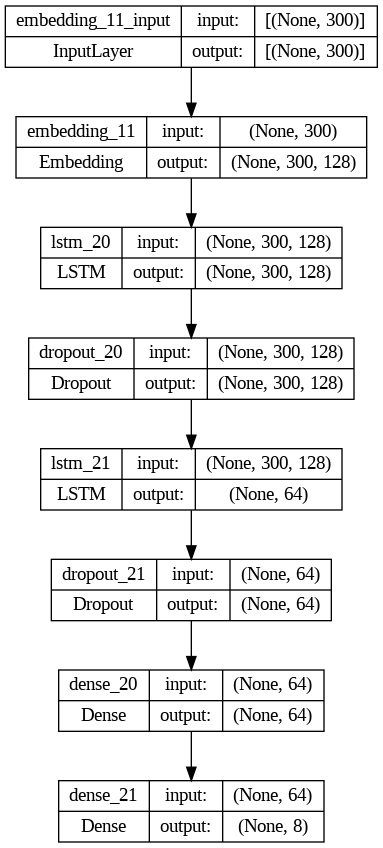

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [ ]:
import time
start_time = time.time() # Measure training time

# Training model
history = model.fit(X_train_pad, y_train_ohe, epochs=100, batch_size=32, validation_data=(X_val_pad, y_val_ohe), verbose=2, class_weight=class_weights_dict, callbacks=[early_stopping, reduce_lr])

duration = time.time() - start_time
minutes = duration / 60
hours = duration / 3600

Epoch 1/100
123/123 - 32s - loss: 1.9943 - accuracy: 0.1447 - val_loss: 1.7819 - val_accuracy: 0.3650 - lr: 0.0010 - 32s/epoch - 261ms/step
Epoch 2/100
123/123 - 12s - loss: 1.5769 - accuracy: 0.5047 - val_loss: 1.5832 - val_accuracy: 0.5248 - lr: 0.0010 - 12s/epoch - 95ms/step
Epoch 3/100
123/123 - 7s - loss: 1.1415 - accuracy: 0.5806 - val_loss: 1.6135 - val_accuracy: 0.3650 - lr: 0.0010 - 7s/epoch - 54ms/step
Epoch 4/100
123/123 - 5s - loss: 0.8779 - accuracy: 0.6308 - val_loss: 1.4383 - val_accuracy: 0.5119 - lr: 0.0010 - 5s/epoch - 37ms/step
Epoch 5/100
123/123 - 4s - loss: 0.5648 - accuracy: 0.7559 - val_loss: 1.5153 - val_accuracy: 0.5421 - lr: 0.0010 - 4s/epoch - 31ms/step
Epoch 6/100
123/123 - 4s - loss: 0.3506 - accuracy: 0.8206 - val_loss: 1.4452 - val_accuracy: 0.5832 - lr: 0.0010 - 4s/epoch - 34ms/step
Epoch 7/100
123/123 - 4s - loss: 0.2501 - accuracy: 0.8746 - val_loss: 1.4477 - val_accuracy: 0.6436 - lr: 0.0010 - 4s/epoch - 31ms/step
Epoch 8/100
123/123 - 3s - loss: 0.2

In [ ]:
print(f"--- Waktu training adalah {duration} detik ---")
print(f"--- Waktu training adalah {minutes} menit ---")
print(f"--- Waktu training adalah {hours} jam ---")

--- Waktu training adalah 151.15268349647522 detik ---
--- Waktu training adalah 2.51921139160792 menit ---
--- Waktu training adalah 0.04198685652679867 jam ---


# Model Evaluation

In [ ]:
# Evaluasi model
y_val_pred = model.predict(X_val_pad)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
print('Validation Classification Report:')
print(classification_report(y_val_encoded, y_val_pred_classes))
print('Validation Confusion Matrix:')
print(confusion_matrix(y_val_encoded, y_val_pred_classes))

print("\n")

y_test_pred = model.predict(X_test_pad)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
print('Test Classification Report:')
print(classification_report(y_test_encoded, y_test_pred_classes))
print('Test Confusion Matrix:')
print(confusion_matrix(y_test_encoded, y_test_pred_classes))

15/15 [==============================] - 1s 10ms/step
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.17      0.15         6
           1       0.60      0.58      0.59        31
           2       0.00      0.00      0.00         2
           3       0.51      0.53      0.52        34
           4       0.57      0.61      0.59        33
           5       0.80      0.82      0.81       298
           6       0.47      0.40      0.43        43
           7       0.29      0.12      0.17        16

    accuracy                           0.69       463
   macro avg       0.42      0.40      0.41       463
weighted avg       0.69      0.69      0.69       463

Validation Confusion Matrix:
[[  1   0   0   0   0   2   3   0]
 [  0  18   0   1   0  10   1   1]
 [  0   0   0   0   0   2   0   0]
 [  0   0   1  18   1  13   1   0]
 [  2   0   1   0  20   9   1   0]
 [  2  10   2  14  12 245  11   2]
 [  2   0   1   2   2 

In [ ]:
# Hitung Balanced Accuracy Score
val_balanced_accuracy = balanced_accuracy_score(y_val_encoded, y_val_pred_classes)
test_balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_test_pred_classes)
print('Validation Balanced Accuracy Score:', val_balanced_accuracy)
print('Test Balanced Accuracy Score:', test_balanced_accuracy)

Validation Balanced Accuracy Score: 0.40316008586743646
Test Balanced Accuracy Score: 0.4476347921719024


In [ ]:
# Evaluasi model pada data uji
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test_ohe)

print('Test Accuracy:', test_accuracy)

8/8 [==============================] - 0s 10ms/step - loss: 1.9484 - accuracy: 0.6797
Test Accuracy: 0.6796537041664124


In [ ]:
def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('Epoch ',fontsize=16)
        ax[idx].set_ylabel('Acc or lost',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)

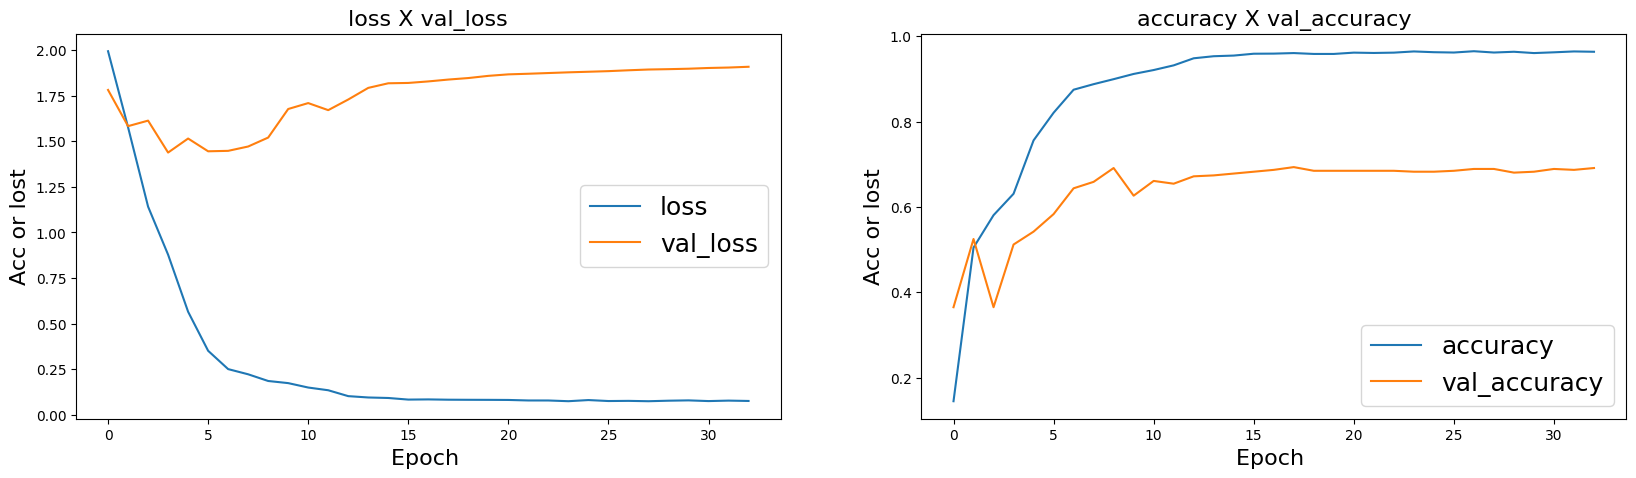

In [ ]:
plot_learning_curves(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

In [ ]:
# Evaluasi model
y_val_pred = model.predict(X_val_pad)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
print('Validation Classification Report:')
print(classification_report(y_val_encoded, y_val_pred_classes))
print('Validation Confusion Matrix:')
print(confusion_matrix(y_val_encoded, y_val_pred_classes))

print("\n")

y_test_pred = model.predict(X_test_pad)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
print('Test Classification Report:')
print(classification_report(y_test_encoded, y_test_pred_classes))
print('Test Confusion Matrix:')
print(confusion_matrix(y_test_encoded, y_test_pred_classes))

15/15 [==============================] - 0s 9ms/step
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.17      0.15         6
           1       0.60      0.58      0.59        31
           2       0.00      0.00      0.00         2
           3       0.51      0.53      0.52        34
           4       0.57      0.61      0.59        33
           5       0.80      0.82      0.81       298
           6       0.47      0.40      0.43        43
           7       0.29      0.12      0.17        16

    accuracy                           0.69       463
   macro avg       0.42      0.40      0.41       463
weighted avg       0.69      0.69      0.69       463

Validation Confusion Matrix:
[[  1   0   0   0   0   2   3   0]
 [  0  18   0   1   0  10   1   1]
 [  0   0   0   0   0   2   0   0]
 [  0   0   1  18   1  13   1   0]
 [  2   0   1   0  20   9   1   0]
 [  2  10   2  14  12 245  11   2]
 [  2   0   1   2   2  

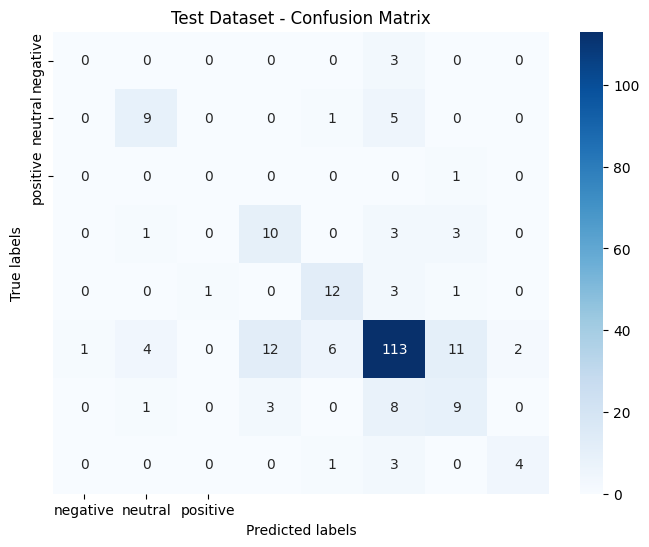

In [ ]:
# Hitung confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_ohe, axis=1), y_test_pred_classes)

# Plot confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['Demografi', 'Ekonomi', 'Geografi', 'Ideologi', 'Pertahanan dan Keamanan'])

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Test Dataset - Confusion Matrix')
plt.show()


0	Demografi
1	Ekonomi
2	Geografi
3	Ideologi
4	Pertahanan dan Keamanan
5	Politik
6	Sosial Budaya
7	Sumber Daya Alam

# Saving Model

In [ ]:
import pickle
from keras.models import load_model
import json

In [ ]:
modelPath= os.path.join(mainPath, "Model_Trained")

In [ ]:
# Menyimpan model
model.save(modelPath + '/lstm_model/model_lstm')

In [ ]:
# Menyimpan tokenizer dengan pickle
with open(modelPath + '/lstm_model/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
tokenizer_json = tokenizer.to_json()
with open(modelPath + '/lstm_model/tokenizer.json', 'w') as json_file:
    json_file.write(tokenizer_json)

In [ ]:
# Menyimpan `max_len` ke dalam file
with open(modelPath + '/lstm_model/model_config.json', 'w') as f:
    json.dump({'max_len': max_len, 'max_features': max_features}, f)

# Load Model and Inference Model

In [ ]:
# Memuat model yang disimpan
loaded_model = load_model(modelPath + '/lstm_model/lstm_model.h5')

# Memuat tokenizer dengan pickle
with open(modelPath + '/lstm_model/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Memuat `max_len` dari file
with open(modelPath + '/lstm_model/model_config.json', 'r') as f:
    config = json.load(f)
    max_len = config['max_len']

In [ ]:
# Fungsi untuk melakukan preprocessing pada data baru (misalnya tokenization dan padding)
def preprocess_data(new_data, tokenizer, max_len):
    sequences = tokenizer.texts_to_sequences(new_data)
    padded_sequences = pad_sequences(sequences, maxlen=max_len)
    return padded_sequences

In [ ]:
# Misalkan 'new_data' adalah daftar teks baru untuk di-inference
new_data = ["Capres di indonesia sangat buruk, politik terlalu jelek, pemeliu bobrok", "Bagaimana ketahanan negara dan alutsista negara kita ini pak??"]

# Preprocessing data baru
new_data_pad = preprocess_data(new_data, tokenizer, max_len)

# Melakukan inference
predictions = loaded_model.predict(new_data_pad)
predicted_classes = np.argmax(predictions, axis=1)

print("Predicted Classes:", predicted_classes)

1/1 [==============================] - 0s 188ms/step
Predicted Classes: [5 4]
